# Machine Learning Project ——Predict NYC Skyscrapers Energy Star Score 

## Introduction: 
Use the provided building energy data to develop a model that can predict a building's Energy Star score, and then interpret the results to find the variables that are most predictive of the score.

Possible Machine learning algorithm: **supervised learning**, **regression**, **Ensemble method** .

Reference: NYC Mayor's office of sustainablity : https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml  
           https://medium.com/@williamkoehrsen 

### Workflow:
1) Data cleaning and formatting     
2) Exploratory data analysis   
3) Features and targets selection    
4) Compare several machine learning models on a performance metric    
5) Perform hyperparameter tuning on the best model   
6) Evaluate the best model on the testing set   
7) Interpret the model results and Draw conclusions  

## Import 
packages: pandas, numpy, scikit-learn, seaborn, matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# import csv data, and store as data
data = pd.read_csv('C:/Users/Xixiong Guo/Documents/data/nyc_benchmarking_disclosure_data_reported_in_2017.csv')
# show the first 5 rows
# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.16E+07,Not Available,Not Available,38139374.2,1.11E+07,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,5/1/2017 17:32,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96E+07,Not Available,Not Available,Not Available,-3.91E+08,933073441,9330734.4,332365924,9.63E+07,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,4/27/2017 11:23,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,4/27/2017 11:23,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Avai

**Notes** (a few explanation based on columns definitions):       
**Parent** property Id/name: some of the buildings are regarded as a building group, so they have a parent property   
**BBL**: 10-digit property borough, block and lot identifier, The first number represents the borough, where 1 is Manhattan,
2 is the Bronx, 3 is Brooklyn, 4 is Queens, and 5 is Staten Island. The following five numbers represent the tax block. If a property has a tax block that is less than 5 digits, then zeros are added before the block number so there are five digits in total. The last four digits are the tax lot number.   
**BBL, BIN**: Parent building including all infos for its children buildings   
**Address, postal code ...**   
**DOF Gross Floor Area**: Gross square footage of the property, per DOF records   
**1st,2nd,3rd largest use type**   
**Occupancy**:The percentage of your property’s Gross Floor Area (GFA) that is occupied   
**Energy score** : 1-100   
**Few lists of energy use**:  Use (kBtu),(kBtu/ft^2), electricity use   
**GHG(green house gas) Emissions (Metric Tons CO2e)**: total, direct, indirect   
**water use**   

In [3]:
#data descriptions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

## Data Cleaning 

replace 'not available' data, and modify numerical data type

In [4]:
# modify the numerical columns from object to float/integer, if there is not available, then use NAN instead
data = data.replace({'Not Available': np.nan})

In [5]:
#For those have numeric columns, need to modify the data type from object to float.
for col in data.columns:
    if ('ft²' in col or 'kBtu' in col or 'CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [6]:
#Check the data type after modification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [7]:
# Check the basic distribution of each numeric column
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186895e+06,5.294566e+06,2.429156e+06,1.196608e+06,2.869005e+08,5.048542e+07,5.361237e+05,5.965472e+06,1.768911e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.499260e+06,5.881290e+06,4.443124e+06,3.570067e+06,3.124610e+09,3.914717e+09,4.019686e+07,3.154430e+07,9.391625e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+05,2.065000e+07,6.855070e+06,7.348107e+04,4.370302e+06,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,9393.000000,986366.000000,6.275850e+06,1.050000e+08,7

missing value percentage stats, function refer from [stack overflow](https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251)

In [8]:
# call a function to output missing value percentage
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 54 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


**Remove** any columns with more than **50%** missing values.

In [9]:
missing_columns = list(missing_values_table(data)[missing_values_table(data)['% of Total Values'] > 50].index)
data = data.drop(columns = list(missing_columns))

Your selected dataframe has 54 columns.
There are 40 columns that have missing values.
Your selected dataframe has 54 columns.
There are 40 columns that have missing values.


Now, columns that have more than 50% data missing have been dropped. Missing values are kept when doing Exploratory Data Analysis (EDA) next Section, but they will have to be filled in for machine learning methods.

## Exploratory Data Analysis (EDA) 

### Single Variable Plotting

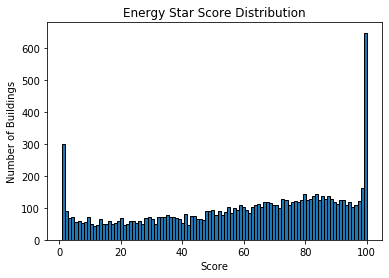

In [10]:
# Energy star histogram
plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100,edgecolor = 'k');
plt.xlabel('Score'); 
plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Before plotting, I would guess the distribution should be more like a normal distribution shape. However, from the histogram, we can see that 0 and 100 are the two most scores, which don't meet expectation.   
If we go back to the definition of the score, we see it is based on self-reported energy usage. Maybe the building owner might be tempted to report lower electricity usage to get a higher score.

Next we are step to plot Site Energy Use Intensity (EUI)(kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²). Those two variables are calculated by Portfolio Manager at the property site, which could be more accurate. We are expected approximately normal distribution with perhaps a few outliers on the low or high end.

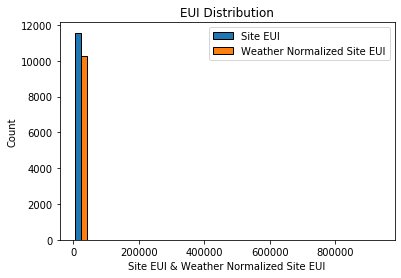

In [11]:
# Histogram of Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²)
plt.hist([data['Site EUI (kBtu/ft²)'].dropna(),data['Weather Normalized Site EUI (kBtu/ft²)'].dropna()], bins = 20, edgecolor = 'black', label=['Site EUI', 'Weather Normalized Site EUI']);
plt.legend(loc=1)
plt.xlabel('Site EUI & Weather Normalized Site EUI'); 
plt.ylabel('Count'); plt.title('EUI Distribution');


In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data['Weather Normalized Site EUI (kBtu/ft²)'].describe()

count     10281.000000
mean        309.747466
std        9784.731207
min           0.000000
25%          65.100000
50%          82.500000
75%         102.500000
max      939329.000000
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64

Mean value is much higher than the median value for both variables. We can conclude that there are a few buildings with very high Site EUI and Weather Normalized Site EUI. 

In [14]:
data['Site EUI (kBtu/ft²)'].sort_values(ascending = False).head(10)

8068    869265.0
7       143974.4
3898    126307.4
8174    112173.6
8268    103562.7
3263     95560.2
8269     84969.6
3383     78360.1
3170     51831.2
3173     51328.8
Name: Site EUI (kBtu/ft²), dtype: float64

### Remove Outliers

Rule:   
On the low end, an extreme outlier is below First Quartile -3 * Interquartile Range   
On the high end, an extreme outlier is above Third Quartile + 3 * Interquartile Range

In [15]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

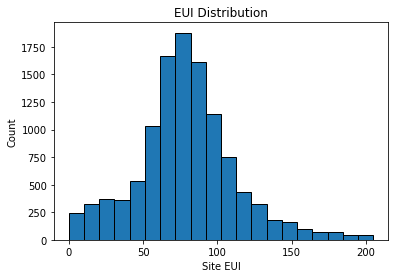

In [16]:
# Histogram of Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²)
plt.hist([data['Site EUI (kBtu/ft²)'].dropna()], bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('EUI Distribution');

Now the results look much resonable, and they're close to normally distributed.

### Correlations

In [17]:
# Find all correlations wrt Energy Star Score and sort 
correlations_data = data.corr()['ENERGY STAR Score'].sort_values()

# Print the most negative correlations
print(correlations_data, '\n')

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135139
Natural Gas Use (kBtu)                                       -0.133655
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Property Id                                                  -0.046605
Indire

These four:    
Site EUI (kBtu/ft²)                                          -0.723864   
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993   
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542   
Source EUI (kBtu/ft²)                                        -0.641037   
should be considered seriously.Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.

In [18]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Select the categorical columns
categorical_subset = data['Largest Property Use Type']

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['ENERGY STAR Score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

In [19]:
features['Largest Property Use Type'].value_counts()

Multifamily Housing           7464
Office                        1157
Hotel                          202
Non-Refrigerated Warehouse     156
Name: Largest Property Use Type, dtype: int64

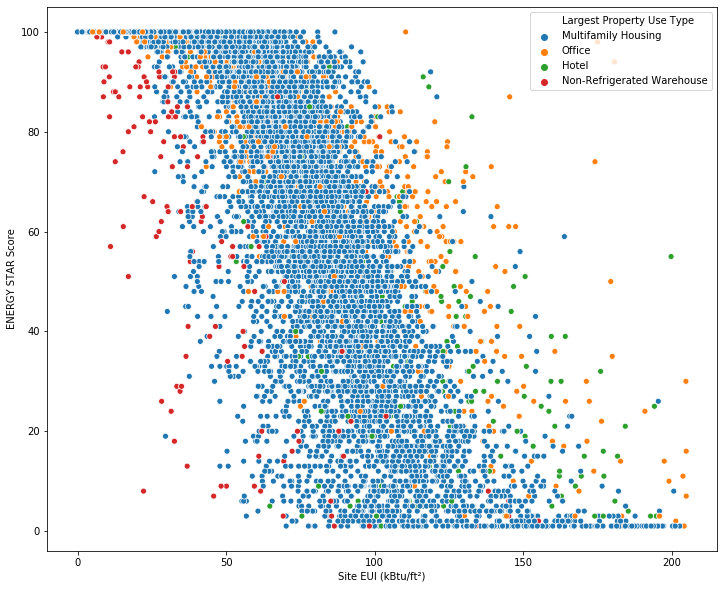

In [20]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

figsize(12,10)
sns.scatterplot(x='Site EUI (kBtu/ft²)', y='ENERGY STAR Score',data=features, hue='Largest Property Use Type')

There is a clear negative relationship between the Site EUI and the score. It does look like this feature will be important for predicting the score of a building.

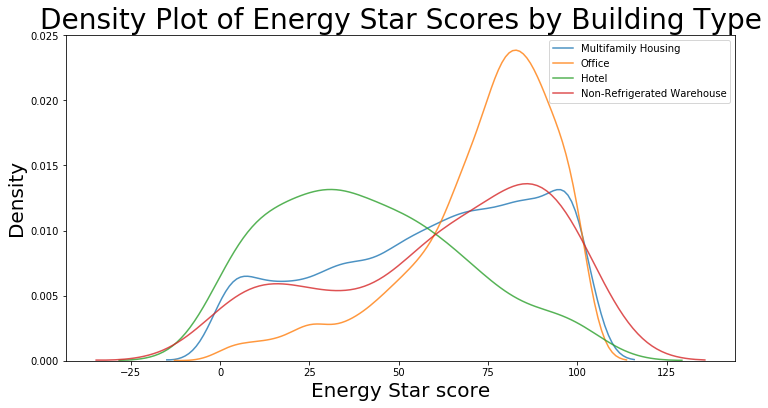

In [21]:
# Plot of distribution of scores for building categories
figsize(12,6)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

Building type does have an effect on the score, therefore it will have to be one-hot encoded for the building type feature before we can feed it into a machine learning model.

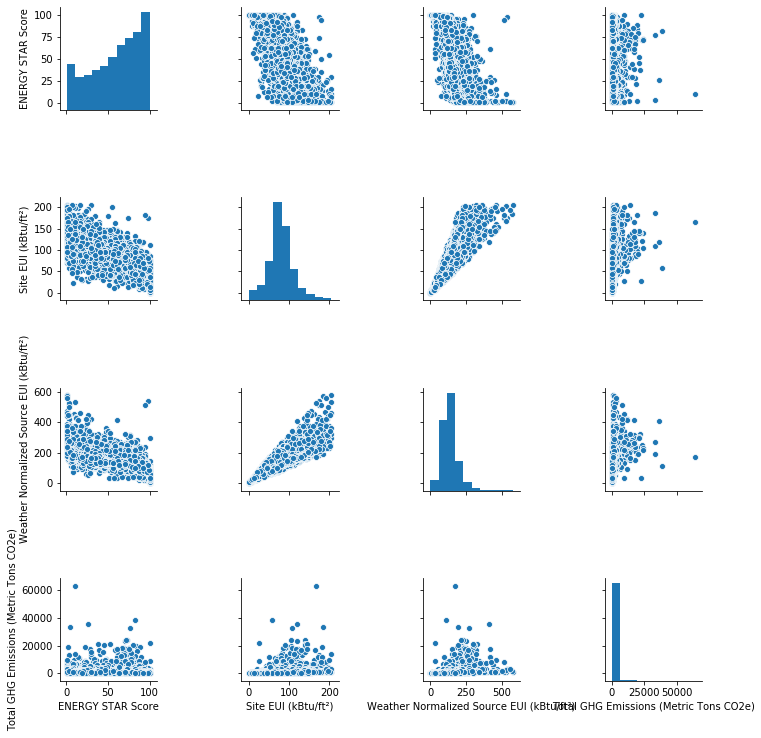

In [22]:
figsize(12,12)
plot_data = features[['ENERGY STAR Score','Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)','Total GHG Emissions (Metric Tons CO2e)']]
plot_data = plot_data.dropna()
sns.pairplot(plot_data)

### Feature engineering and selections

In [23]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

        
# Select the categorical columns
categorical_subset = data['Largest Property Use Type']

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 72)

In [24]:
features.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Adult Education,Automobile Dealership,Bank Branch,College/University,Convenience Store without Gas Station,Courthouse,...,Museum,Non-Refrigerated Warehouse,Office,Other,Other - Education,Other - Entertainment/Public Assembly,Other - Lodging/Residential,Other - Mall,Other - Public Services,Other - Recreation,Other - Services,Other - Specialty Hospital,Outpatient Rehabilitation/Physical Therapy,Parking,Performing Arts,Pre-school/Daycare,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",Residence Hall/Dormitory,Residential Care Facility,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Urgent Care/Clinic/Other Outpatient,Wholesale Club/Supercenter,Worship Facility
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,20,2777309,NaN,323000.0,1907,7,100,NaN,120.0,125.2,8.7,0.9,193.6,52400000.0,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


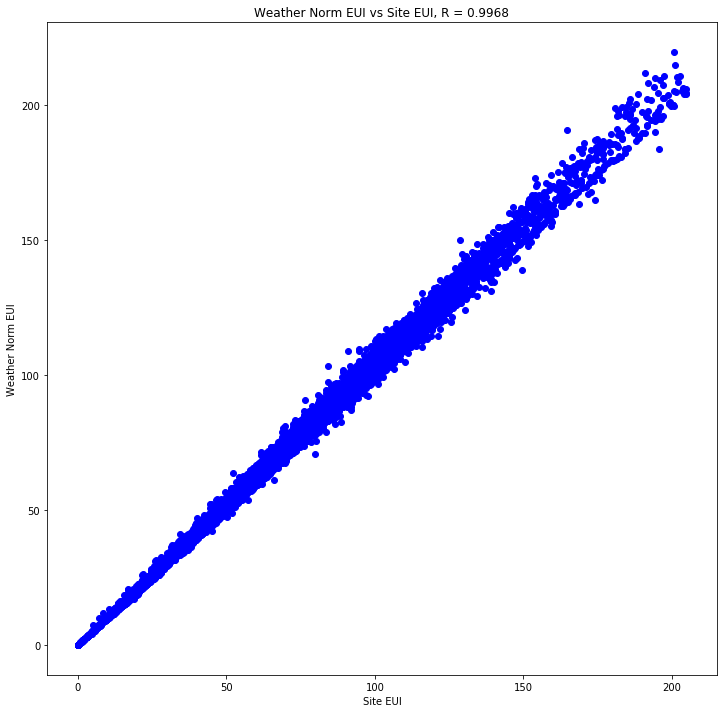

In [25]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

### Remove Collinear Features   
Remove columns with high collinear features, keep one and discard the other one

In [26]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['ENERGY STAR Score'] = y
               
    return x

In [27]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [28]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 58)

Final data set is consistes of 59 features (1 target score). Then these features will be applied to machine learning process in the next section.

## Machine Learning

### Split into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:

1. Training set, which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
2. Testing set, which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.     

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.

Splitting the data into a random training and testing set using scikit-learn



In [29]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['ENERGY STAR Score'].isna()]
score = features[features['ENERGY STAR Score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 58)
(9461, 58)


In [30]:
#seperate features and targets
features = score.drop(columns='ENERGY STAR Score')
targets = pd.DataFrame(score['ENERGY STAR Score'])

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 57)
(2839, 57)
(6622, 1)
(2839, 1)


6622 building in training set, 2839 buildings in testing set

### Baseline establishment 

Before the ML model deployment, it is essential to set up a baseline by naive guess. If the models we build cannot outperform a naive guess then we might have to admit that there's some problems in the ML model.

Here, using the median value as a guess, MAE(mean absolute error) as the performance metric

In [31]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


In [32]:
# Inputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

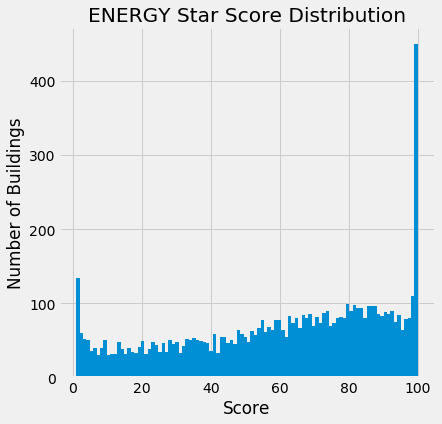

In [33]:
# Histogram of the Energy Star Score
figsize(6,6)
plt.style.use('fivethirtyeight')
plt.hist(y['ENERGY STAR Score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

### Imputing Missing Values
First of all, need to fill in the n/a values with 'Medium' values

In [34]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(X)

# Transform both training data and testing data
X = imputer.transform(X)
X_test = imputer.transform(X_test)

In [35]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


### Model Evaluation

4 models are going to be tested:
    
Linear Regression   
Support Vector Machine Regression   
Random Forest Regression   
K-Nearest Neighbors Regression

In [36]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [37]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [38]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.5557


In [39]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 11.0364


In [40]:
random_forest = RandomForestRegressor(n_estimators = 100)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5607


In [41]:
knn = KNeighborsRegressor(n_neighbors=20)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.0285


In [42]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 9.9666


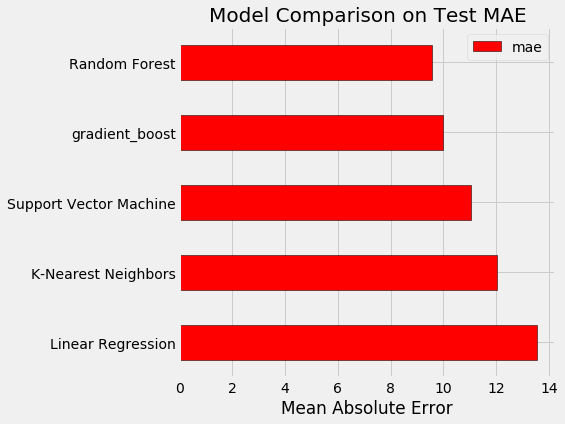

In [43]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest','K-Nearest Neighbors','gradient_boost'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, knn_mae,gradient_boosted_mae]})
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
# Plot formatting
figsize(6,6)
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Depending on the run (the exact results change slighty each time), the Random Forest performs the best followed by the K-Nearest Neighbors. Admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. (the random forest is great for starting out because the performance is less dependent on the model settings). Nonetheless, from these results, we can conclude that machine learning is applicable 

## Hyperparameter Tuning 

By grid search and k-folder validation, the best hyperparameters for the RF model will be determined as follows:

In [44]:
# Number of trees used in the boosting process
n_estimators = [100, 200, 400, 800, 1000]

# Maximum depth of each tree
max_depth = [2, 4, 8, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [45]:
# Create the model to use for hyperparameter tuning
model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.5min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [46]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [47]:
# Randomsearch has narrowed down the hyperparameters range, then use grid search to finalize.
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [350, 375, 400, 425, 450],'max_depth': [11, 13, 15, 17, 19]}

model = RandomForestRegressor(min_samples_leaf = 2,
                              min_samples_split = 2,
                              max_features = None,
                              random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [48]:
# Select the best model
final_model = grid_search.best_estimator_

final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=425, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Prediction, Results Comparison

In [49]:
# Final model after fine-tune
final_pred = final_model.predict(X_test)

print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Final model performance on the test set:   MAE = 9.4797.


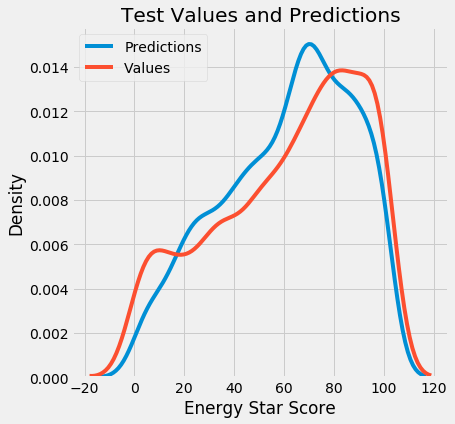

In [50]:
# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

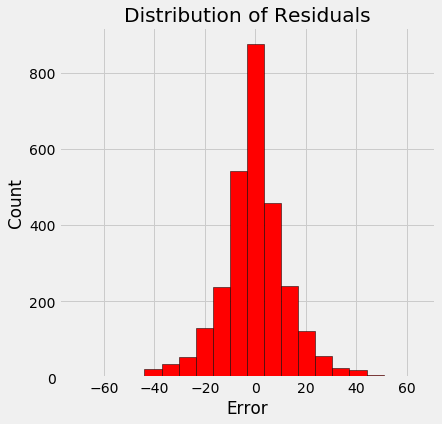

In [51]:
# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally disributed, with a few noticeable outliers on the low end. 

In [53]:
# Visualize the important features
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': final_model.feature_importances_})

# List the most important 10 features
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Site EUI (kBtu/ft²),0.620312
1,Weather Normalized Site Electricity Intensity ...,0.155133
2,Multifamily Housing,0.066868
3,Property Id,0.026448
4,DOF Gross Floor Area,0.026406
5,Order,0.024340
6,Year Built,0.021340
7,Water Intensity (All Water Sources) (gal/ft²),0.018603
8,Non-Refrigerated Warehouse,0.012281
9,Weather Normalized Site Natural Gas Intensity ...,0.007478


## Conclusion

we can see that this random forest model can predict the score well, with an error of **9.48%**. The main reason of this error is caused by some huge outliers on both sides. As mentioned above, the distribution of the **Energy Star score** is not quite reasonable. There're unexpected amount of scores located at 0 or 100 points, and these outliers, which calculated by the building owner themselves may be not accurate. However, the features used for machine learning algorithm are mainly determined by other sources, which are more reliable. This difference can definitely increase the errors predicted 

Overall, this project still can be regarded as a sucessful and accurate work!!